# Proyecto ICE

Empezamos importando las librerías que vamos a utilizar durante el análisis, leemos nuestro archivo csv y tratamos de analizar la información correspondiente a nuestro conjunto de datos.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
df = pd.read_csv('/datasets/games.csv')
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


# Primer paso

A continuación pasaremos todas las columnas a minúsculas, transformaremos la columna users score de tipo object a numérico, veremos una muestra del contenido de nuestro conjunto de datos con la función head, luego sumaremos los valores ausentes de cada columna para analizarlos, además, decidí remplazar sólo los valores ausentes de las columnas name y genre por unknown y no los valores ausentes de las otras columnas ya que en mi opinión no afectaban al análisis que pretendía hacer.

In [2]:
df.columns = df.columns.str.lower()

In [3]:
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


In [7]:
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [8]:
df.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [9]:
df['name'].fillna('Unknown', inplace=True)

df['genre'].fillna('Unknown', inplace=True)
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
df['user_score'].interpolate(method='linear', inplace=True)
df['critic_score'] = pd.to_numeric(df['critic_score'], errors='coerce')
df['critic_score'].interpolate(method='linear', inplace=True)


# Paso 2

Ahora sumaremos todas las ventas de las columnas na_sales, eu_sales, jp_sales, other_sales y los resultados los almacenaremos en la columna total_sales

In [10]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.000000,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,79.0,8.150000,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.300000,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.000000,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,83.0,8.166667,NaN,31.38


# Paso 3

en el primer gráfico podemos observar que las ventas de videojuegos empezaron a crecer fuertemente en 1994 llegando a su punto más alto en los años 2008 y 2009, de ahí fueron bajando el número de ventas pero aún se mantienen con un buen margen.

<AxesSubplot:>

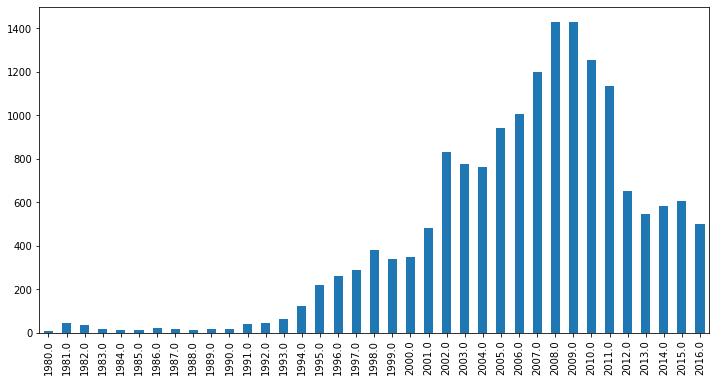

In [11]:
games_per_year = df['year_of_release'].value_counts().sort_index()
games_per_year.plot(kind='bar', figsize=(12,6))

# 3.1

En el siguiente gráfico podemos observar las plataformas con más exito en ventas y por ende las más rentables siendo la plataforma más exitosa el PS2 seguido en segundo lugar por el X360 y en tercer lugar el PS3.

<AxesSubplot:xlabel='platform'>

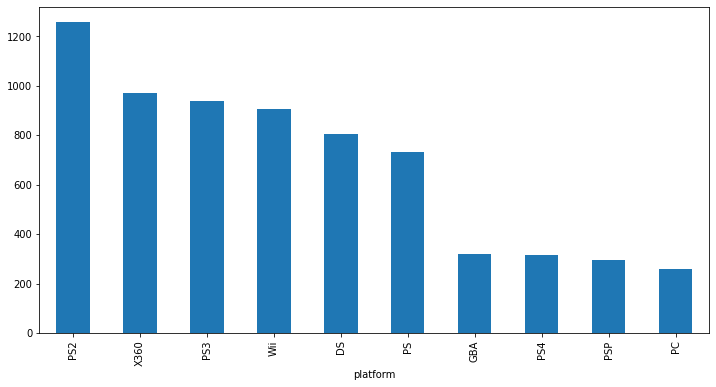

In [12]:
sales_by_platform = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
sales_by_platform.head(10).plot(kind='bar', figsize=(12,6))

In [13]:
print(sales_by_platform.head(10))

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
Name: total_sales, dtype: float64


# 3.2

En el siguiente gráfico se aprecian las plataformas más exitosas en ventas a lo largo de los años y su duración aproximada en el mercado, pudiendo destacar que las platafromas más vendidas tardan aproximadamente un lapso 10 años desde el inicio hasta su final.

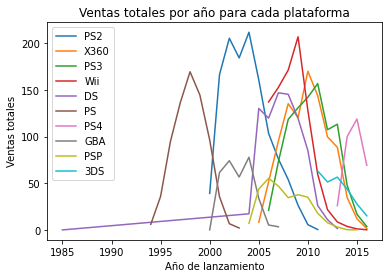

In [14]:
sales_per_year_and_plataform = df.groupby(['year_of_release', 'platform'])['total_sales'].sum().reset_index()

top_plataforms = sales_per_year_and_plataform.groupby('platform')['total_sales'].sum().nlargest(10).index

data_top_plataforms = sales_per_year_and_plataform[sales_per_year_and_plataform['platform'].isin(top_plataforms)]

for plataform in top_plataforms:
    data_plataforms = data_top_plataforms[data_top_plataforms['platform'] == plataform]
    plt.plot(data_plataforms['year_of_release'], data_plataforms['total_sales'], label=plataform)

plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas totales')
plt.title('Ventas totales por año para cada plataforma')
plt.legend()
plt.show()

# 3.3

En este diagrama de caja se trata de representar las ventas globales de juegos por cada plataforma, en el que se puede observar que hay datos muy variados indicando que en algunos como por ejemplo el Wii tienen una mediana alta y muchos valores atípicos lo que podría representar que tiene juegos que son muy populares y se venden mucho pero también tienen otros que al contrario casi no se venden, mientras que en otras plataformas tienen menos valores atípicos y datos un poco más equilibrados dando a entender que sus ventas de cada juego son menos discrepantes entre unos y otros. 

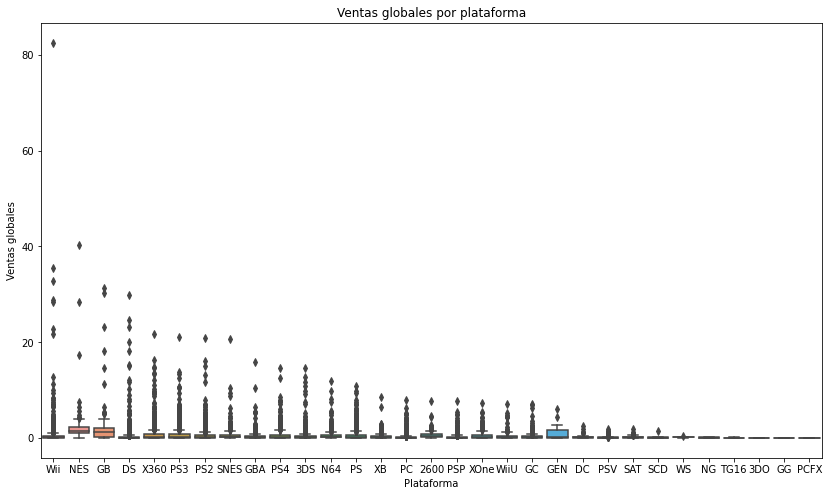

In [15]:
plt.figure(figsize=(14,8))
sns.boxplot(x='platform', y='total_sales', data=df)
plt.title('Ventas globales por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas globales')
plt.show()

# 3.4

En el siguiente gráfico tratamos de mostrar la correlación entre las reseñas de los usuarios y las ventas de la plataforma PS2, y podemos observar que aunque hay una  correlación positiva, no es lo suficientemente fuerte para afectar demasiado en los resultados de las ventas, es decir que, aunque si juegan un papel pequeño las reseñas en las ventas de los juegos, seguramente hay otros factores que pueden influenciar también e incluso de una mayor manera en las ventas.

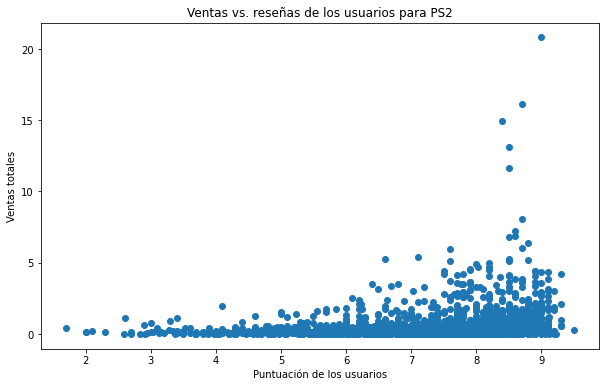

In [16]:

plataforma_popular = 'PS2'


datos_plataforma = df[df['platform'] == plataforma_popular]


plt.figure(figsize=(10,6))
plt.scatter(datos_plataforma['user_score'], datos_plataforma['total_sales'])
plt.title('Ventas vs. reseñas de los usuarios para ' + plataforma_popular)
plt.xlabel('Puntuación de los usuarios')
plt.ylabel('Ventas totales')
plt.show()


In [17]:
correlacion = datos_plataforma['user_score'].corr(datos_plataforma['total_sales'])
print('La correlación entre las reseñas de los usuarios y las ventas es', correlacion)

La correlación entre las reseñas de los usuarios y las ventas es 0.20147496320938496


# 3.5

El siguiente código sirve para comparar las ventas de un juego en diferentes plataformas por ejemplo el juego de super mario bros se vendió mucho más en la plataforma NES que en la de GB.

In [18]:
juego_popular = 'Super Mario Bros.'
datos_juego = df[df['name'] == juego_popular]
print(datos_juego[['platform', 'total_sales']])

    platform  total_sales
1        NES        40.24
201       GB         5.07


# 3.6

 Mediante el siguiente código podemos observar la relación entre las ventas y el género de los juegos dando como resultado que los géneros más populares y con mayor número de ventas son los de acción, seguidos por los de deportes y shooter.

In [19]:
ventas_por_genero = df.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
print(ventas_por_genero)

genre
Action          1744.17
Sports          1331.27
Shooter         1052.45
Role-Playing     934.56
Platform         827.77
Misc             802.51
Racing           728.67
Fighting         447.53
Simulation       389.97
Puzzle           242.57
Adventure        237.59
Strategy         174.23
Unknown            2.42
Name: total_sales, dtype: float64


# Paso 4

A continuación tratamos de analisar las diferencias en las ventas de plataformas en los distintos paises, pudiendo observar que en cada uno de los 3 tienen diferentes preferencias ya que en NA la plataforma más vendida es el X360, en EU es el PS2 y en JP el el DS.

NA: platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
Name: na_sales, dtype: float64
EU: platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
PS      213.61
Name: eu_sales, dtype: float64
JP: platform
DS      175.57
PS      139.82
PS2     139.20
SNES    116.55
3DS     100.67
Name: jp_sales, dtype: float64


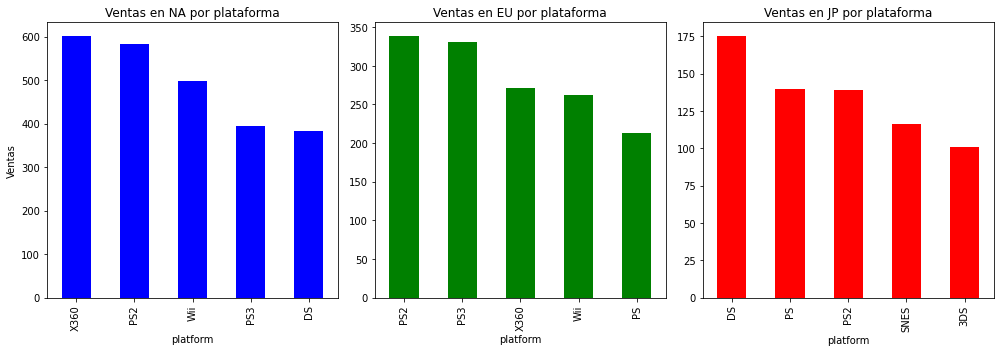

In [20]:
ventas_por_plataforma_na = df.groupby('platform')['na_sales'].sum().nlargest(5)
ventas_por_plataforma_eu = df.groupby('platform')['eu_sales'].sum().nlargest(5)
ventas_por_plataforma_jp = df.groupby('platform')['jp_sales'].sum().nlargest(5)

print('NA:', ventas_por_plataforma_na)
print('EU:', ventas_por_plataforma_eu)
print('JP:', ventas_por_plataforma_jp)

plt.figure(figsize=(14, 5))

plt.subplot(1, 3, 1)
ventas_por_plataforma_na.plot(kind='bar', color='b')
plt.title('Ventas en NA por plataforma')
plt.ylabel('Ventas')

plt.subplot(1, 3, 2)
ventas_por_plataforma_eu.plot(kind='bar', color='g')
plt.title('Ventas en EU por plataforma')

plt.subplot(1, 3, 3)
ventas_por_plataforma_jp.plot(kind='bar', color='r')
plt.title('Ventas en JP por plataforma')

plt.tight_layout()
plt.show()

Aquí tratamos de analizar las ventas con relación al género de los videojuegos en cada país del conjunto de datos dando como resultado que tanto en NA como en EU el género más vendido es el de Acción mientras que en JP el mas vendido es Role-Playing.

NA: genre
Action      879.01
Sports      684.43
Shooter     592.24
Platform    445.50
Misc        407.27
Name: na_sales, dtype: float64
EU: genre
Action     519.13
Sports     376.79
Shooter    317.34
Racing     236.51
Misc       212.74
Name: eu_sales, dtype: float64
JP: genre
Role-Playing    355.41
Action          161.43
Sports          135.54
Platform        130.83
Misc            108.11
Name: jp_sales, dtype: float64


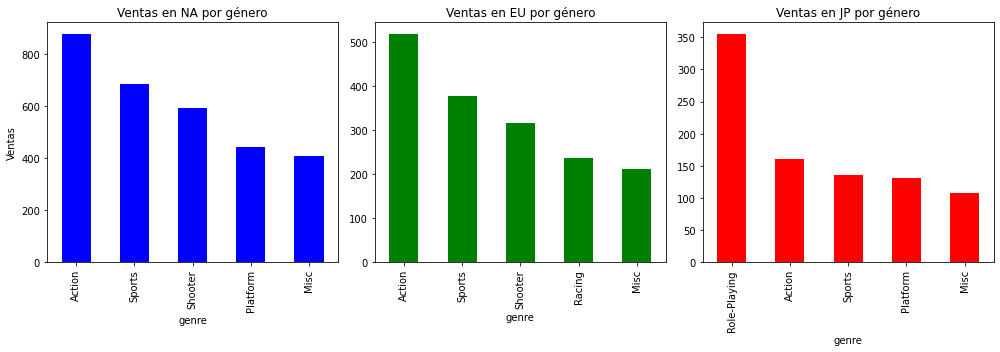

In [21]:
ventas_por_genero_na = df.groupby('genre')['na_sales'].sum().nlargest(5)
ventas_por_genero_eu = df.groupby('genre')['eu_sales'].sum().nlargest(5)
ventas_por_genero_jp = df.groupby('genre')['jp_sales'].sum().nlargest(5)

print('NA:', ventas_por_genero_na)
print('EU:', ventas_por_genero_eu)
print('JP:', ventas_por_genero_jp)

plt.figure(figsize=(14, 5))

plt.subplot(1, 3, 1)
ventas_por_genero_na.plot(kind='bar', color='b')
plt.title('Ventas en NA por género')
plt.ylabel('Ventas')

plt.subplot(1, 3, 2)
ventas_por_genero_eu.plot(kind='bar', color='g')
plt.title('Ventas en EU por género')

plt.subplot(1, 3, 3)
ventas_por_genero_jp.plot(kind='bar', color='r')
plt.title('Ventas en JP por género')

plt.tight_layout()
plt.show()

Mediante los siguientes resultados podemos observar que las clasificaciones de ESRB parecen tener un impacto en las ventas en todas las regiones teniendo como dato en común  que la clasificacion E es la mas vendida en todas.

NA: rating
AO         1.26
E       1292.99
E10+     353.32
EC         1.53
K-A        2.56
M        748.48
RP         0.00
T        759.75
Name: na_sales, dtype: float64
EU: rating
AO        0.61
E       710.25
E10+    188.52
EC        0.11
K-A       0.27
M       483.97
RP        0.08
T       427.03
Name: eu_sales, dtype: float64
JP: rating
AO        0.00
E       198.11
E10+     40.20
EC        0.00
K-A       1.46
M        64.24
RP        0.00
T       151.40
Name: jp_sales, dtype: float64


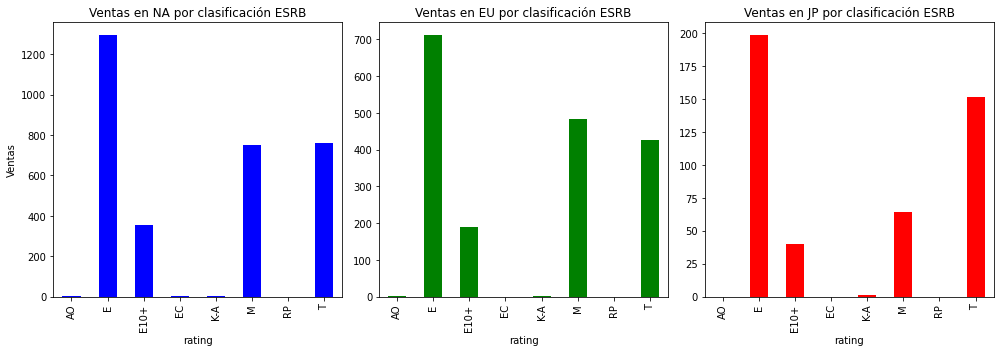

In [22]:
ventas_por_esrb_na = df.groupby('rating')['na_sales'].sum()
ventas_por_esrb_eu = df.groupby('rating')['eu_sales'].sum()
ventas_por_esrb_jp = df.groupby('rating')['jp_sales'].sum()

print('NA:', ventas_por_esrb_na)
print('EU:', ventas_por_esrb_eu)
print('JP:', ventas_por_esrb_jp)

plt.figure(figsize=(14, 5))

plt.subplot(1, 3, 1)
ventas_por_esrb_na.plot(kind='bar', color='b')
plt.title('Ventas en NA por clasificación ESRB')
plt.ylabel('Ventas')

plt.subplot(1, 3, 2)
ventas_por_esrb_eu.plot(kind='bar', color='g')
plt.title('Ventas en EU por clasificación ESRB')

plt.subplot(1, 3, 3)
ventas_por_esrb_jp.plot(kind='bar', color='r')
plt.title('Ventas en JP por clasificación ESRB')

plt.tight_layout()
plt.show()

# Paso 5

Para formular las hipótesis nula y alternativa, primero analizamos las preguntas de investigación que en este caso son si las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas y si las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes. La hipótesis nula siempre es una declaración en la que no hay diferencia mientras que la hipótesis alternativa es lo opuesto a la hipótesis nula.
El criterio que utilizamos para probar las hipótesis es la prueba t de Student para muestras independientes ya que esta prueba se utiliza cuando queremos comparar las medias de dos grupos diferentes que en este caso son las calificaciones de los usuarios para las plataformas Xbox One y PC y las calificaciones para los géneros Acción y Deportes.


Primera hipótesis:
Hipótesis nula: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
Hipótesis alternativa: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes.
valor de umbral alfa: 0.05

In [23]:
xbox_one_scores = df[df['platform'] == 'XOne']['user_score'].dropna()
pc_scores = df[df['platform'] == 'PC']['user_score'].dropna()

t_stat, p_val = stats.ttest_ind(xbox_one_scores, pc_scores, equal_var=False)

print('t-statistic:', t_stat)
print('p-value:', p_val)

t-statistic: -4.0485479734872065
p-value: 6.152614177621378e-05


En este caso y en base a los resultados rechazamos la hipótesis nula y concluimos que hay una diferencia significativa entre las calificaciones promedio de los usuarios para las plataformas Xbox One y PC.

Segunda hipótesis:
Hipótesis nula: Las calificaciones promedio de los usuarios para los géneros de acción y deportes son las mismas.
Hipótesis alternativa: Las calificaciones promedio de los usuarios para los géneros de acción y deportes son diferentes.
valor de umbral alfa: 0.05

In [24]:
action_scores = df[df['genre'] == 'Action']['user_score'].dropna()
sports_scores = df[df['genre'] == 'Sports']['user_score'].dropna()

t_stat, p_val = stats.ttest_ind(action_scores, sports_scores, equal_var=False)

print('t-statistic:', t_stat)
print('p-value:', p_val)

t-statistic: 2.1870136786091017
p-value: 0.028789637114748197


En base a estos resultados podemos observar que el valor de p es menor al valor de umbral alfa 0.5 lo cual nos da a entender que las calificaciones promedio de los usuarios para los géneros de acción y deportes son significativamente diferentes.